In [25]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------
import warnings
warnings.filterwarnings("ignore")

### RESUMEN DE LAS FASES ANTERIORES

En las fases anteriores, hemos realizado una exploración y transformación de los datos, creación de nuestra base de datos y A/B Testing



- Exploración y transformación de datos: duplicados, gestión de nulos, modificación de tipos de datos...
- Creación de base de datos: Usamos el lenguaje de Python para cargar nuestros datos en MySQL.
- A/B Testing: Comprobamos si había diferencias significativas entre los diferentes grupos de satisfacción y ver si hay relación entre la satisfacción laboral y rotación de los empleados.

### VISUALIZACIONES

ANALISIS GENERAL DE LA EMPRESA

- Distribución demográfica de los empleado
- Distribución por roles y niveles de educación.

ANALISIS DEL NIVEL DE SATISFACCION

- Distribución del nivel de satisfacción de los empleados.
- Alguna comparación entre departamentos y satisfacción.

ANALISIS DE ROTACION
- Tasa de rotación de los empleados.
- Comparación de tasas de rotación por departamentos.
- Relación entre la satisfacción laboral y la rotación.

In [26]:
df = pd.read_csv("Files/df_fase1.csv", index_col=0)
df.head()

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,0,"162,0",52,1972,No,no-data,684.0,6,3,no-data,1,Male,51.0,3,5,Research Director,3,no-data,6462.0,7,No,13,3,3,0,no-data,5,3,20,15,15,True
1,1,"259,0",53,1971,No,no-data,699.0,1,4,Life Sciences,1,Male,65.0,2,5,Manager,3,no-data,5678.0,0,no-data,14,3,1,1,"34,0",5,3,33,11,9,True
2,2,"319,0",43,1981,No,travel_rarely,532.0,4,2,Technical Degree,1,Male,58.0,3,5,Manager,4,Married,4933.0,1,No,11,3,4,0,"22,0",3,3,22,11,15,True
3,3,"1900,0",49,1975,No,no-data,117.0,22,3,Medical,1,Female,58.0,3,4,Manager,4,no-data,2437.0,3,No,11,3,2,1,no-data,3,3,22,4,7,True
4,4,"81,0",60,1964,No,no-data,1435.0,25,3,Life Sciences,1,Female,99.0,3,3,Sales Executive,1,no-data,2354.0,7,no-data,11,3,4,0,"28,0",3,2,21,7,9,True


In [27]:
personal_info = ['Age','Gender','MaritalStatus','Education','EducationField']
employee_satisfacion = ['EnviromentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']
job_extras = ['OverTime', 'BusinessTravel', 'StockOptionLevel', 'TrainingTimesLastYear', 'RemoteWork', 'PerformanceRating']
salary = ["HourlyRate","DailyRate","MonthlyRate","PercentSalaryHike"]
job_data = ["Attrition","JobLevel","JobRole","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]

# Personal Info

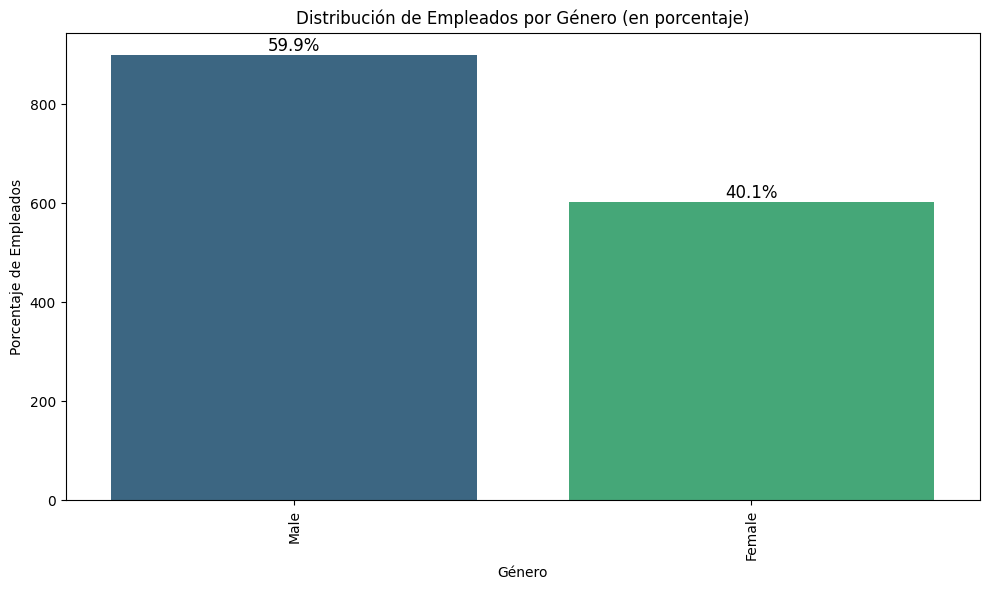

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el porcentaje de cada categoría de 'Gender'
gender_counts = df['Gender'].value_counts(normalize=True) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Gender", data=df, palette="viridis")

# Añadir etiquetas y título
plt.xticks(rotation=90)
plt.xlabel("Género")
plt.ylabel("Porcentaje de Empleados")
plt.title("Distribución de Empleados por Género (en porcentaje)")

# Añadir el porcentaje sobre cada barra
for p in ax.patches:
    # Calcular el porcentaje correspondiente a cada barra
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    # Colocar el texto del porcentaje sobre la barra
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 1, 
            percentage, ha="center", va="bottom", fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



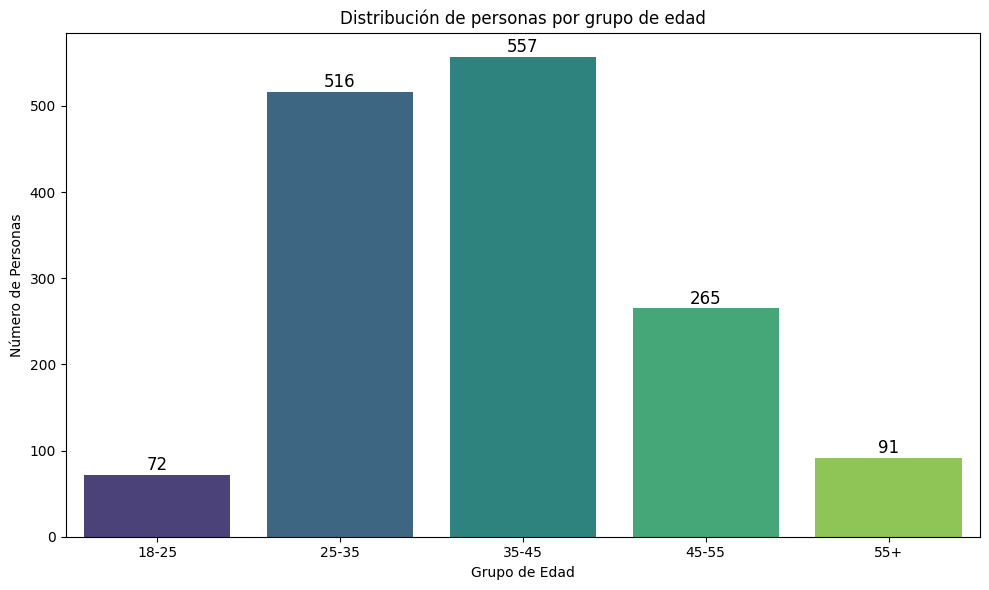

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los límites de las franjas de edad
bins = [18, 25, 35, 45, 55, float('inf')]

# Definir los nombres para las franjas de edad
labels = ['18-25', '25-35', '35-45', '45-55', '55+']

# Crear una nueva columna en el DataFrame que agrupa las edades en las franjas definidas
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Contar cuántas personas hay en cada franja de edad
age_group_counts = df['Age Group'].value_counts().sort_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.title('Distribución de personas por grupo de edad')

# Añadir el número de personas sobre cada barra
for i, count in enumerate(age_group_counts.values):
    ax.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


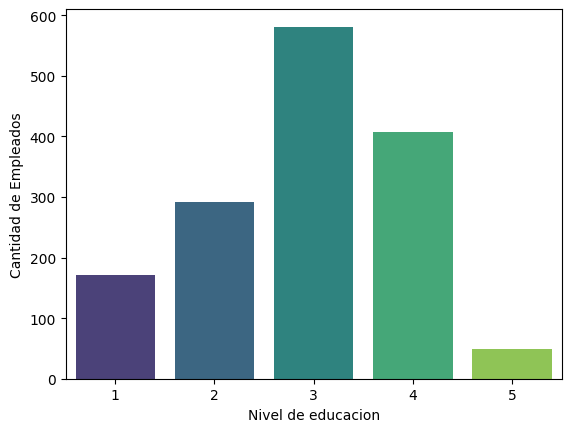

In [30]:

sns.countplot(x = "Education", 
              data = df,
              palette= "viridis")


plt.xlabel("Nivel de educacion")
plt.ylabel("Cantidad de Empleados");

# JOB DATA

In [ ]:
["Attrition","JobLevel","JobRole","NumCompaniesWorked","TotalWorkingYears","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager"]

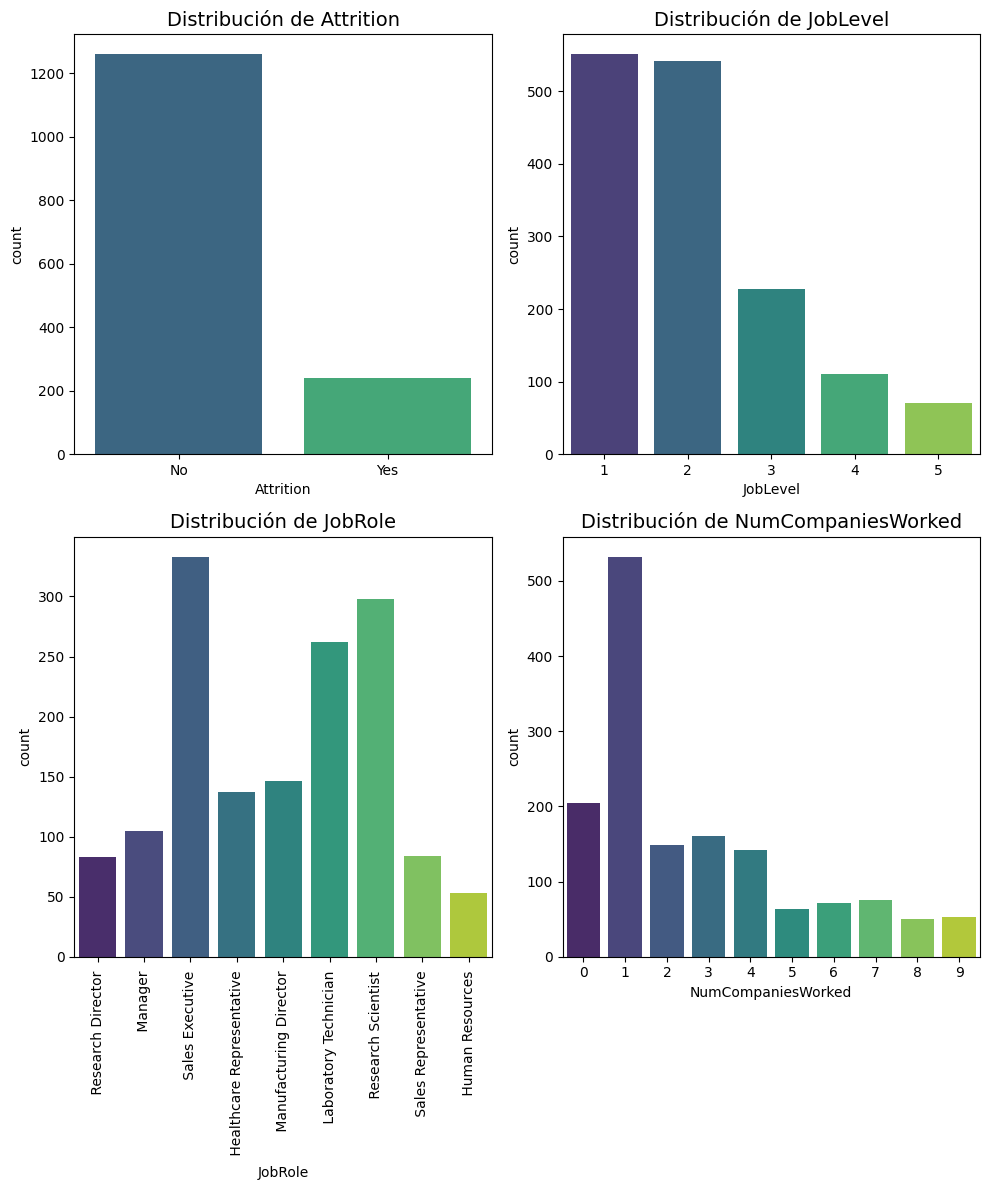

In [60]:

# Lista de columnas a graficar
columns = ["Attrition", "JobLevel", "JobRole", "NumCompaniesWorked"]

# Crear una figura con subplots (ajustar el número de filas y columnas)
fig, axes = plt.subplots(2, 2, figsize=(10, 12)) 

# Ajustar el espacio entre los gráficos
plt.tight_layout(pad=5.0)

# Crear cada gráfico de barras en su respectivo subplot
for i, col in enumerate(columns):
    # Seleccionar el subplot correspondiente (axes[0, 0], axes[0, 1], etc.)
    ax = axes[i // 2, i % 2]
    
    # Crear el gráfico de barras para la columna
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    
    # Añadir el título correspondiente
    ax.set_title(f'Distribución de {col}', fontsize=14)
    
    # Ajustar etiquetas si es necesario
    if col == "JobRole":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar la figura con todos los gráficos
plt.tight_layout()
plt.show()


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Agrupar 'TotalWorkingYears' cada 5 años
df['TotalWorkingYearsGroup'] = pd.cut(df['TotalWorkingYears'],labels=['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '45+'])

# Agrupar 'YearsAtCompany', dejando sin cambios los que llevan más de 15 años
df['YearsAtCompanyGroup'] = df['YearsAtCompany'].apply(lambda x: '15+' if x > 15 else x)

# Agrupar 'YearsSinceLastPromotion', agrupando los que llevan más de 10 años
df['YearsSinceLastPromotionGroup'] = df['YearsSinceLastPromotion'].apply(lambda x: '10+' if x > 10 else x)

# Agrupar 'YearsWithCurrManager', agrupando los que llevan más de 10 años
df['YearsWithCurrManagerGroup'] = df['YearsWithCurrManager'].apply(lambda x: '10+' if x > 10 else x)

# Lista de columnas a graficar (modificadas)
columns = ["Attrition", "JobLevel", "JobRole", "NumCompaniesWorked", 
           "TotalWorkingYearsGroup", "YearsAtCompanyGroup", 
           "YearsSinceLastPromotionGroup", "YearsWithCurrManagerGroup"]

# Crear una figura con subplots (ajustar el número de filas y columnas)
fig, axes = plt.subplots(4, 2, figsize=(16, 18))  # 4 filas, 2 columnas

# Ajustar el espacio entre los gráficos
plt.tight_layout(pad=5.0)

# Crear cada gráfico de barras en su respectivo subplot
for i, col in enumerate(columns):
    # Seleccionar el subplot correspondiente (axes[0, 0], axes[0, 1], etc.)
    ax = axes[i // 2, i % 2]
    
    # Crear el gráfico de barras para la columna
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    
    # Añadir el título correspondiente
    ax.set_title(f'Distribución de {col}', fontsize=14)
    
    # Ajustar etiquetas si es necesario
    if col == "JobRole":
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Mostrar la figura con todos los gráficos
plt.tight_layout()
plt.show()


TypeError: cut() missing 1 required positional argument: 'bins'

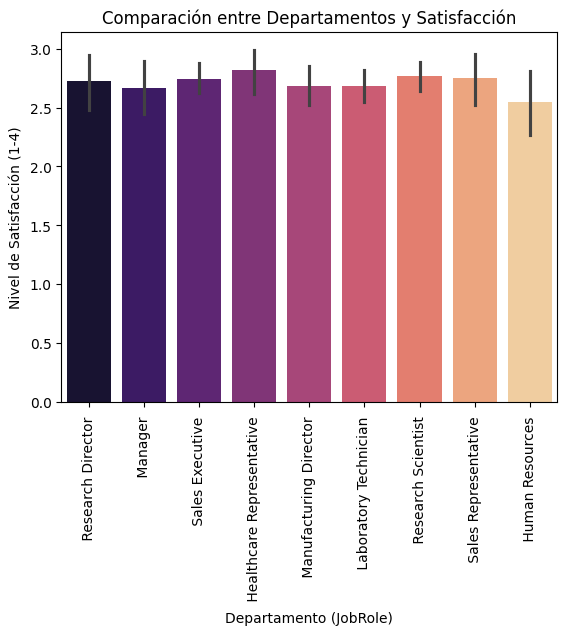

In [44]:
# Comparación entre departamento y nivel de satisfacción:

sns.barplot(x = "JobRole",
            y = "JobSatisfaction",
            data = df,
            palette = "magma")

plt.title('Comparación entre Departamentos y Satisfacción')
plt.xlabel('Departamento (JobRole)')
plt.ylabel('Nivel de Satisfacción (1-4)')

plt.xticks(rotation=90);

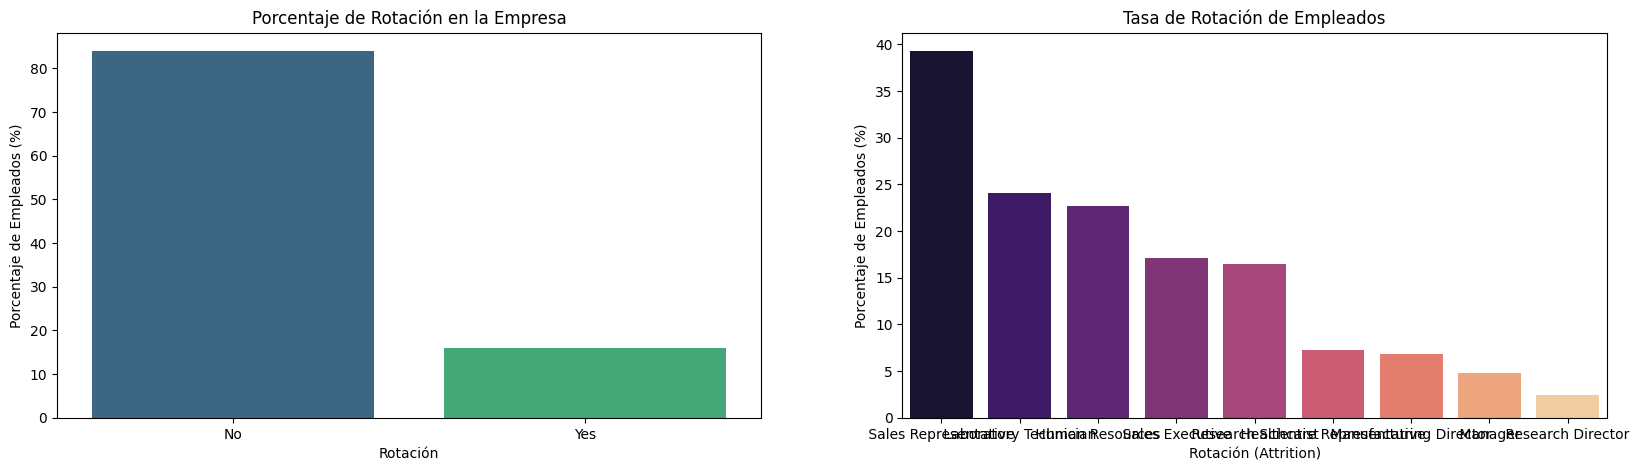

In [54]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

rotacion_count = df['Attrition'].value_counts(normalize=True) * 100

sns.barplot(x=rotacion_count.index, 
            y=rotacion_count.values,
            ax = axes[0],
            palette="viridis")

rotacion_por_departamento = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100
rotacion_por_departamento = rotacion_por_departamento.sort_values(by='Yes', ascending=False)  # Ordenar de mayor a menor rotación

sns.barplot(x=rotacion_por_departamento.index, 
            y=rotacion_por_departamento['Yes'], 
            ax = axes[1],
            palette="magma")

axes[0].set_title("Porcentaje de Rotación en la Empresa")
axes[0].set_xlabel("Rotación")

axes[0].set_ylabel("Porcentaje de Empleados (%)")


plt.title('Tasa de Rotación de Empleados')
plt.xlabel('Rotación (Attrition)')
plt.ylabel('Porcentaje de Empleados (%)');

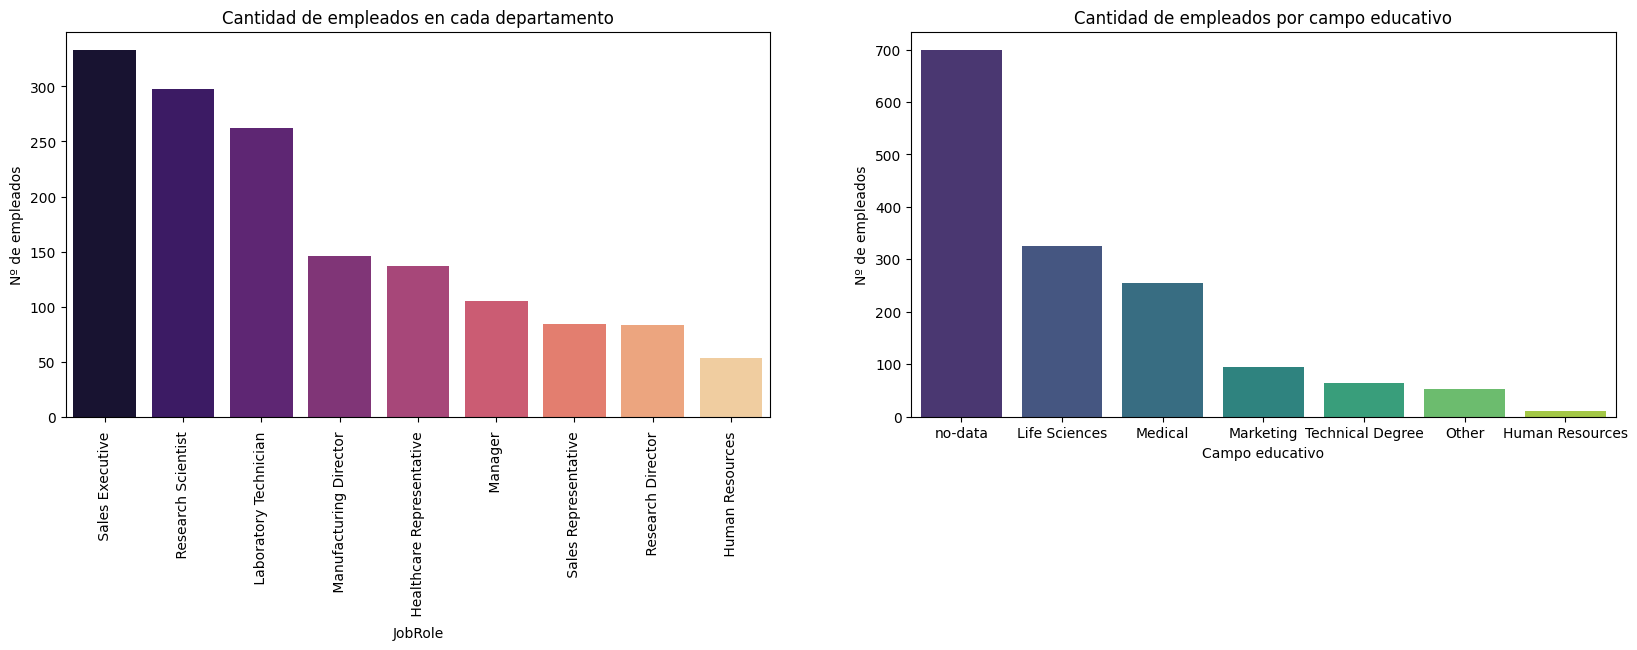

In [45]:
# Distribución de empleados por departamento y educación:

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

# Insertar los datos:
roles_count = df['JobRole'].value_counts()

sns.barplot(x = roles_count.index,
            y = roles_count.values,
            ax = axes[0], # indicamos en que eje quiero posicionarlo
            palette = "magma")

axes[0].set_xticklabels(roles_count.index, rotation=90)

education_count = df["EducationField"].value_counts()

sns.barplot(x = education_count.index, 
            y = education_count.values,
            ax = axes[1], # indico en que eje quiero posicionarlo
            palette = "viridis")


# Insertar título y título de ejes:

    ## JobRole

axes[0].set_title("Cantidad de empleados en cada departamento")

axes[0].set_xlabel("JobRole")

axes[0].set_ylabel("Nº de empleados")

    ## 2018

axes[1].set_title("Cantidad de empleados por campo educativo")

axes[1].set_xlabel("Campo educativo")

axes[1].set_ylabel("Nº de empleados");

# EMPLOYEE SATISFACTION

In [46]:
'EnviromentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'

('EnviromentSatisfaction',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'WorkLifeBalance')

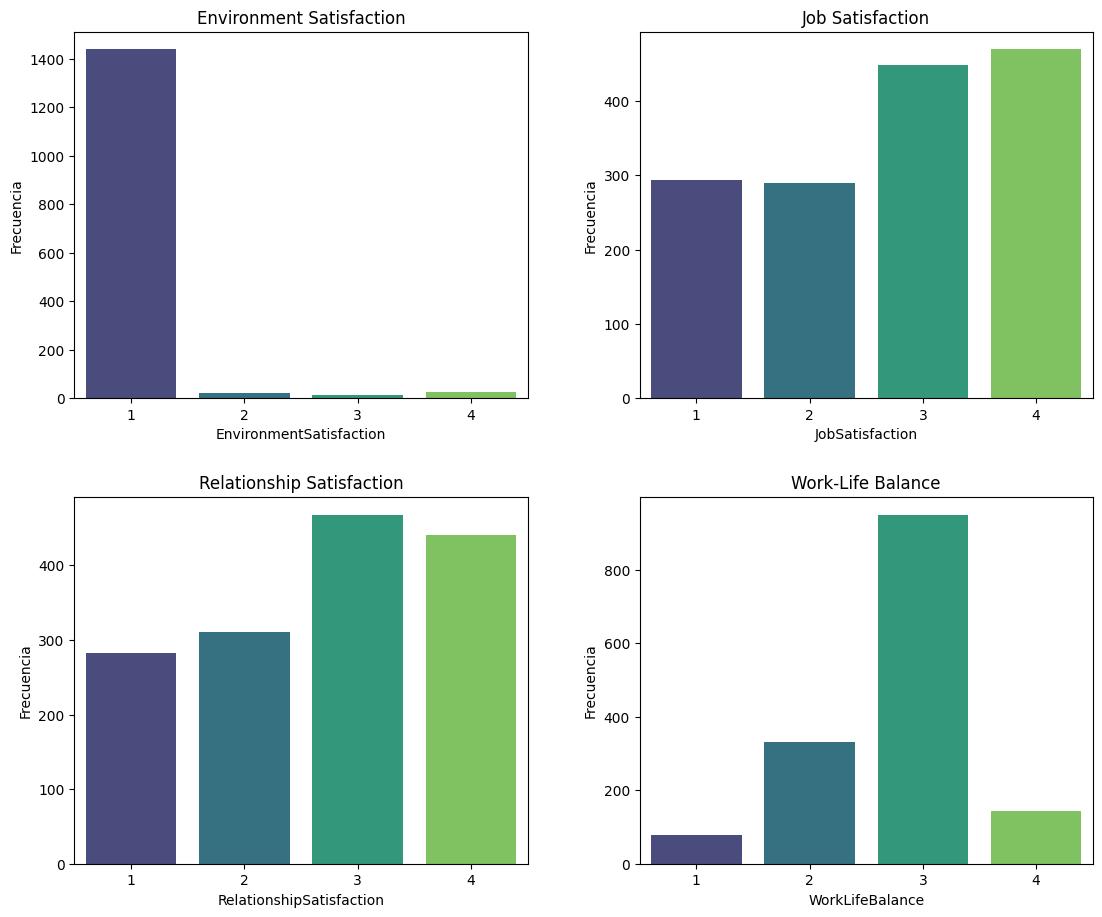

In [47]:


# Crear una figura con 4 subplots (2 filas y 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Ajustar el espacio entre los gráficos
plt.tight_layout(pad=5.0)

# Lista de columnas a graficar
columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Títulos para los gráficos
titles = ['Environment Satisfaction', 'Job Satisfaction', 'Relationship Satisfaction', 'Work-Life Balance']

# Crear cada gráfico de barras en su respectivo subplot
for i, col in enumerate(columns):
    # Seleccionar el subplot correspondiente (axes[0, 0], axes[0, 1], etc.)
    ax = axes[i // 2, i % 2]
    
    # Crear el gráfico de barras para la columna
    sns.countplot(x=col, data=df, palette='viridis', ax=ax)
    
    # Añadir el título correspondiente
    ax.set_title(titles[i])
    
    # Añadir etiquetas a los ejes
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Mostrar la figura con los 4 gráficos
plt.show()


In [63]:
# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['EnviromentSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calculamos los porcentajes para cada grupo
porcentajes = conteo_grupos.apply(lambda x: x / x.sum() * 100, axis=1)

# Paso 3: Crear el gráfico de barras
ax = porcentajes.plot(kind='bar', stacked=True, color=['blue', 'purple'])

# Añadir títulos y etiquetas
plt.title('Porcentaje de Attrition en Grupo A y B')
plt.ylabel('Porcentaje')
plt.xlabel('Grupo (GroupSatisfaction)')
plt.legend(title='Attrition', labels=['No (Sigue)', 'Yes (Se fue)'])
plt.xticks(rotation=0)

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Mostrar el porcentaje en cada barra
    if height > 0:
        ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

# Mostrar el gráfico
plt.show()

KeyError: 'EnviromentSatisfaction'

CONCLUSIONES

- Podemos dar recomendaciones sobre como retener empleados como mejorar beneficios, bienestar laboral...

- Se ha visto que cuanta menos satisfacción hay entre los empleados, mayor es la tasa de rotación por lo que hay que mejorar el ambiente laboral